In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.getcwd()  # This will show your current working directory
#os.chdir('path_to_least_squares_folder')  # Change to the directory where helpers.py is located
os.chdir('/content/drive/My Drive/Colab Notebooks/Localization/Particle Filter 2D')

In [ ]:
os.getcwd()
os.listdir()

['plot2d.py',
 '__init__.py',
 '__pycache__',
 'filter2d.py',
 'Particle Filter 2D.ipynb']

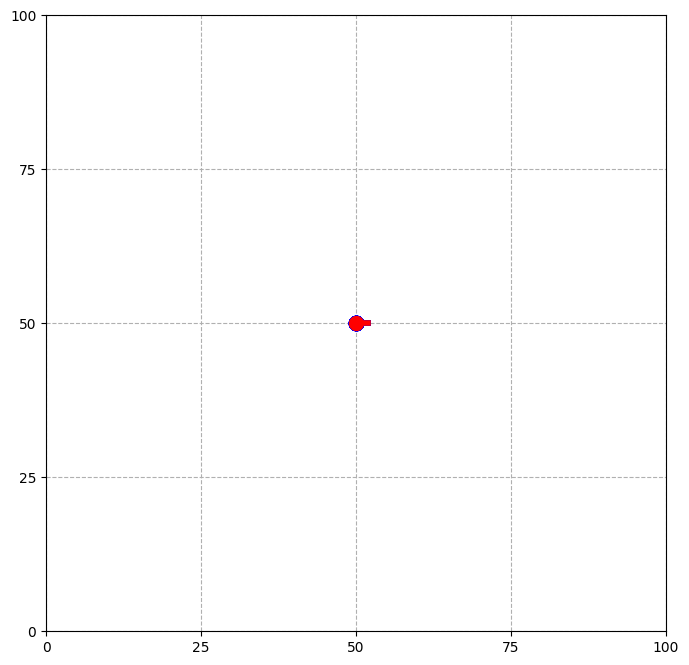

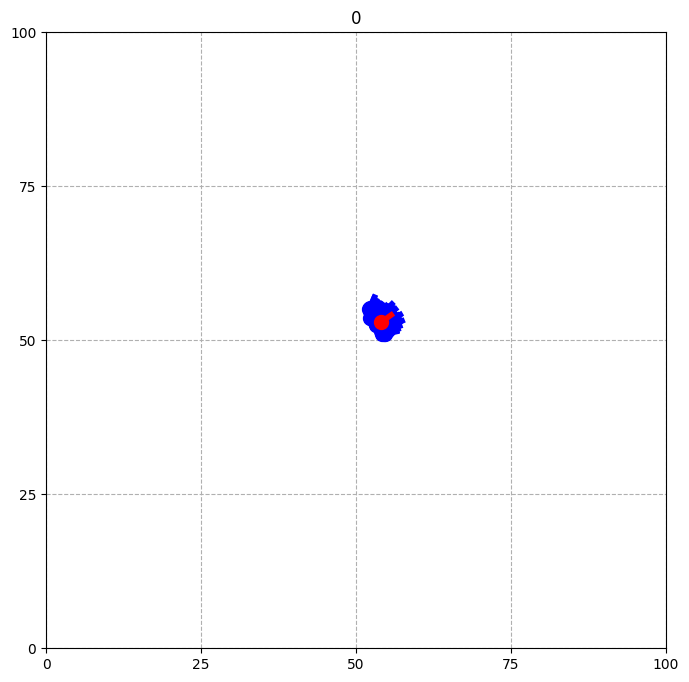

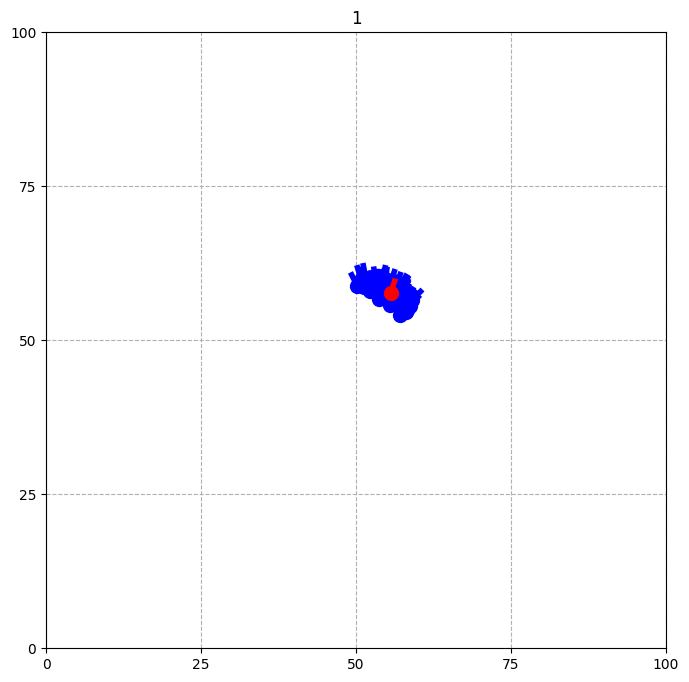

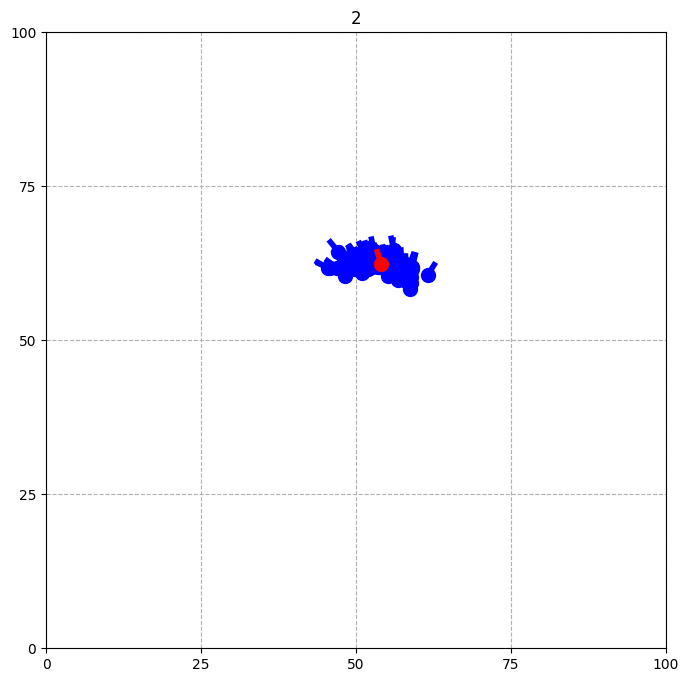

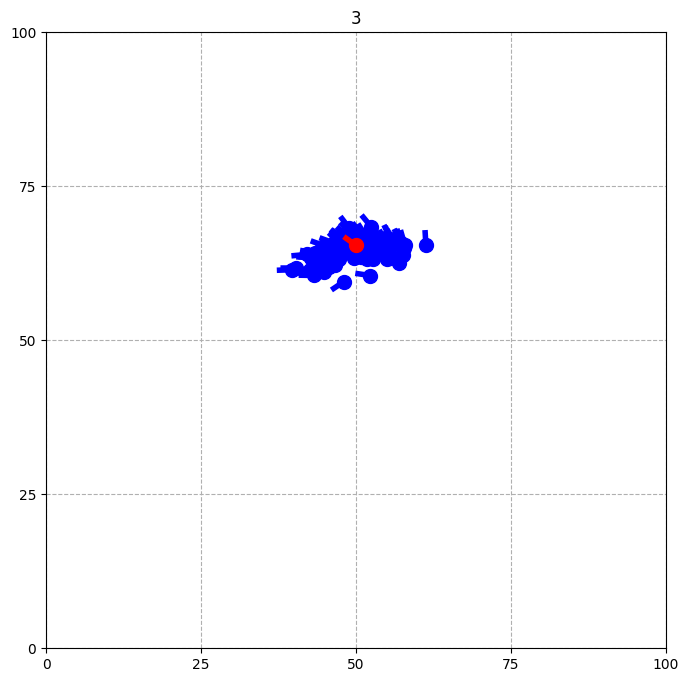

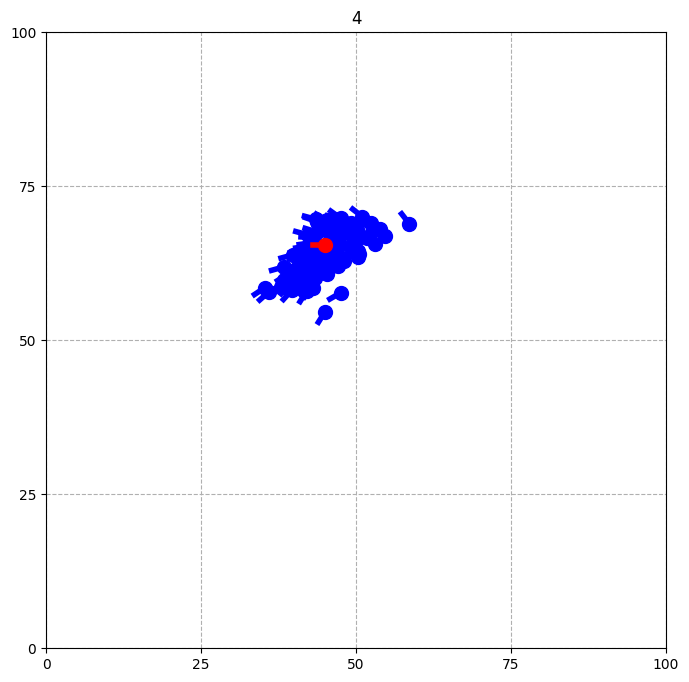

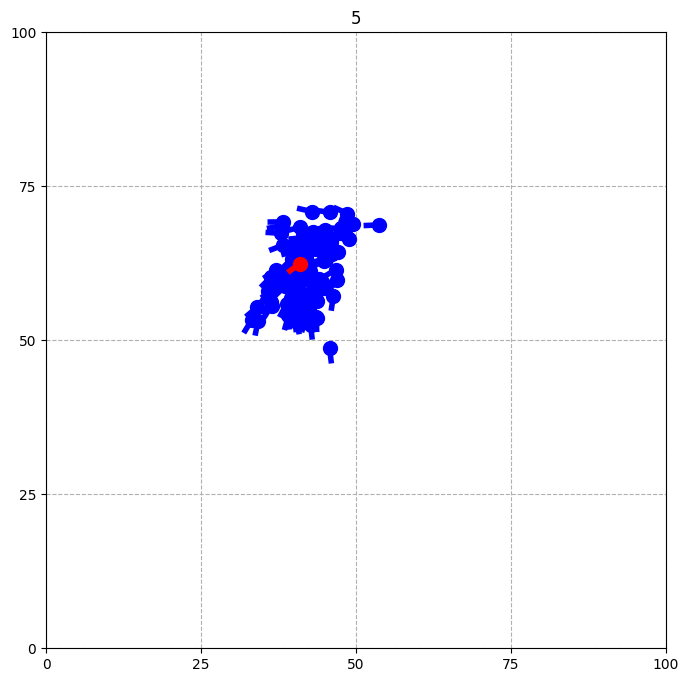

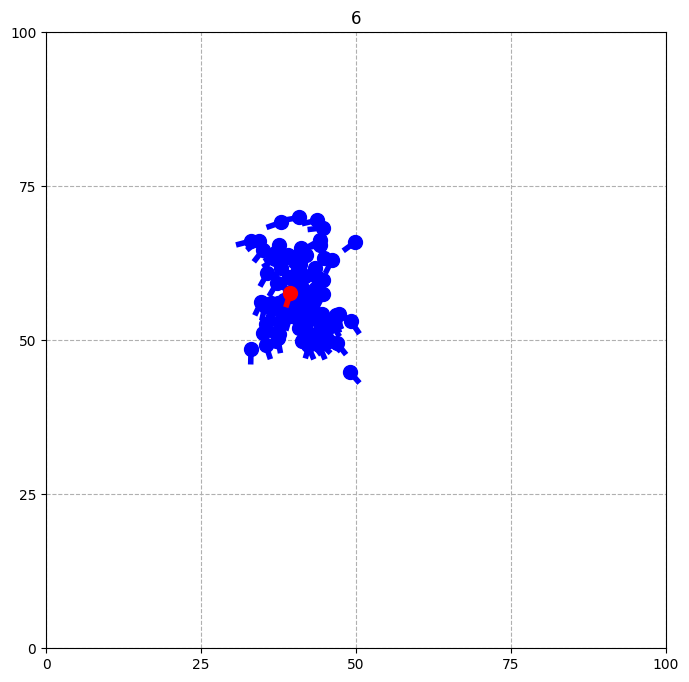

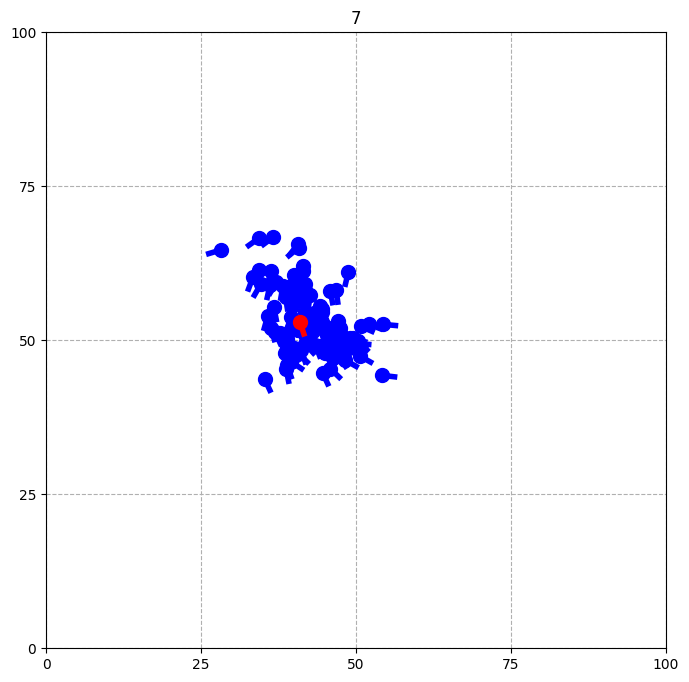

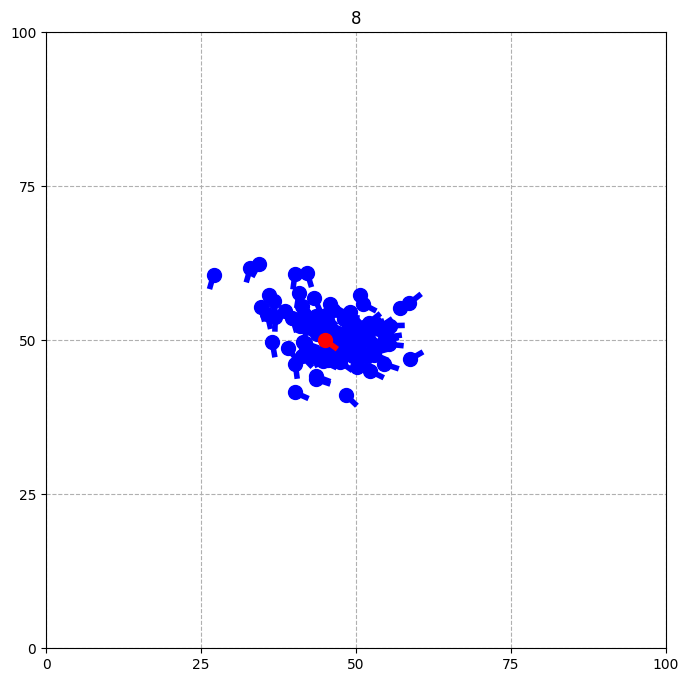

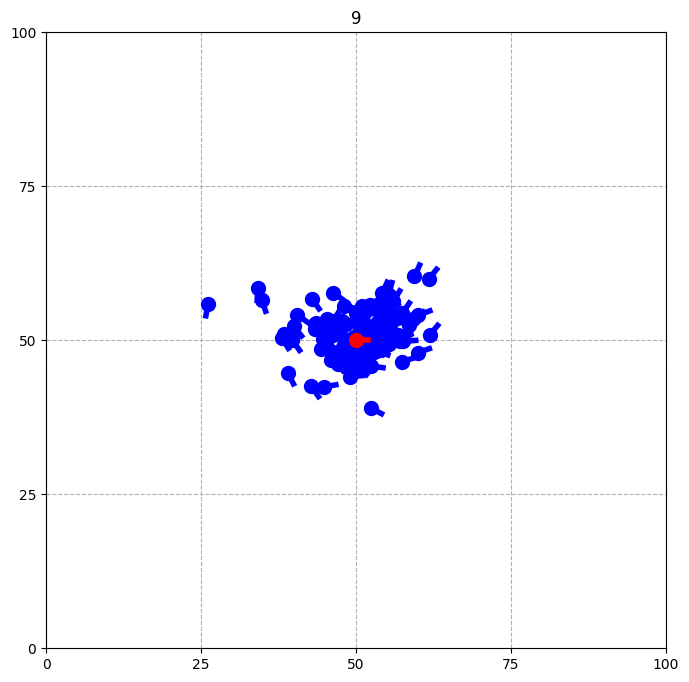

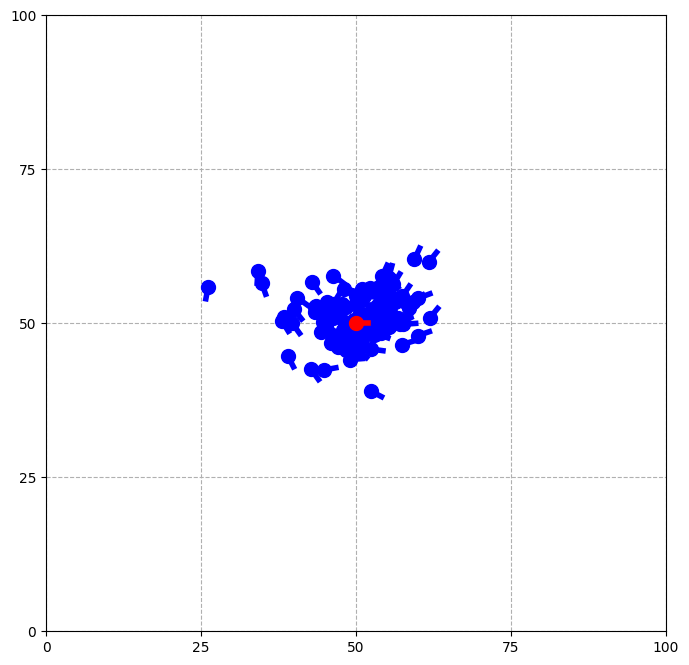

In [ ]:
from plot2d import plot
from filter2d import Robot, Particle
import random as r
import math

robot = Robot([50, 50, 0])
particles = []
for i in range(100):
    particles += [Particle([50, 50, 0])]
plot(robot, particles)

autorun = True
for j in range(10):
    robot.move(5, math.pi * 2 / 10)
    for particle in particles:
        particle.predict(5, math.pi * 2 / 10)
    plot(robot, particles, j=j, autorun=autorun)

plot(robot, particles)


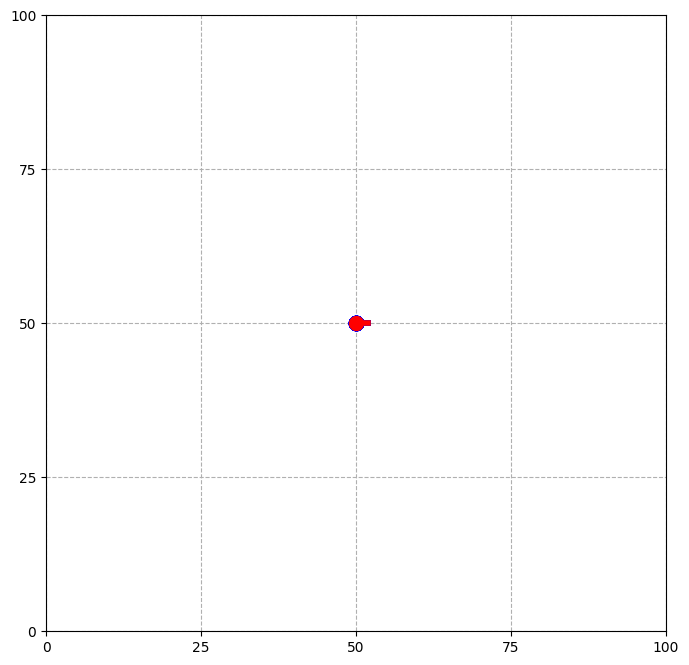

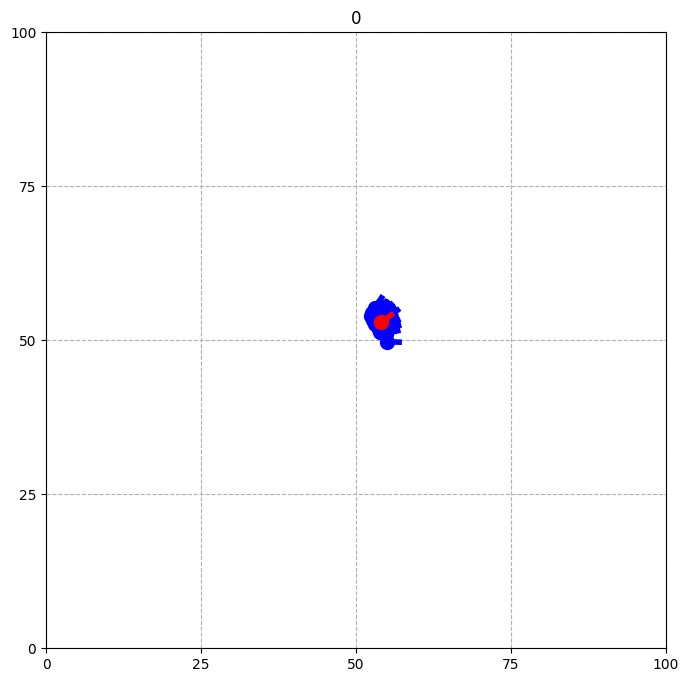

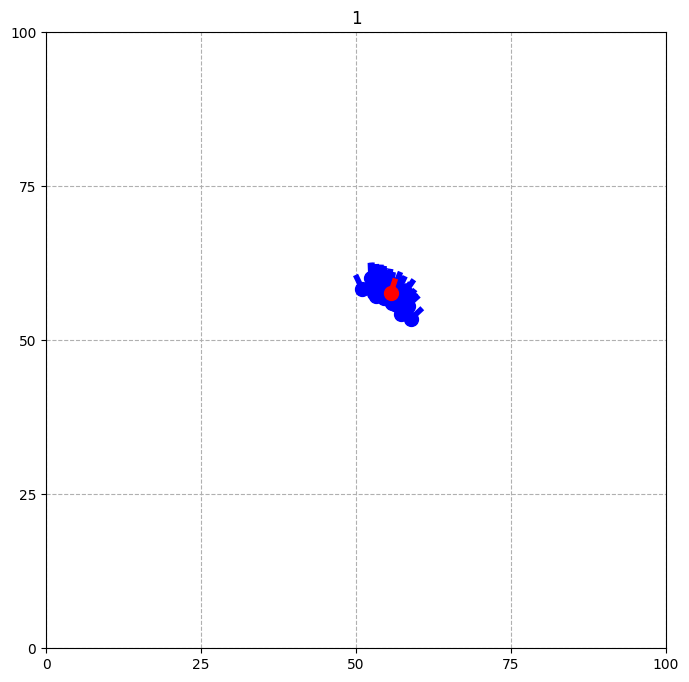

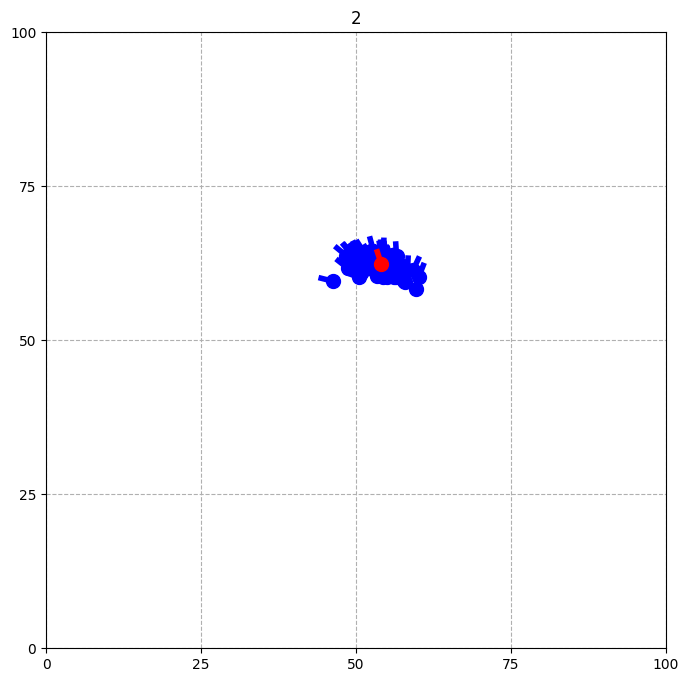

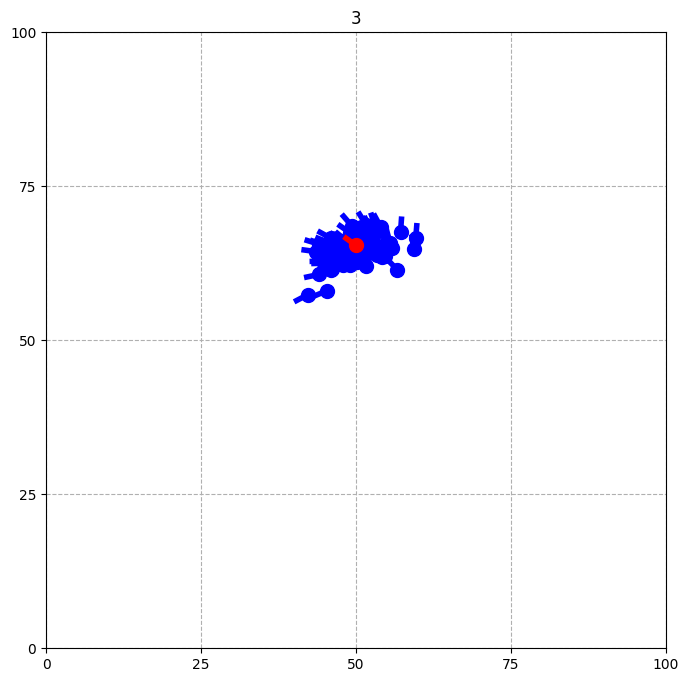

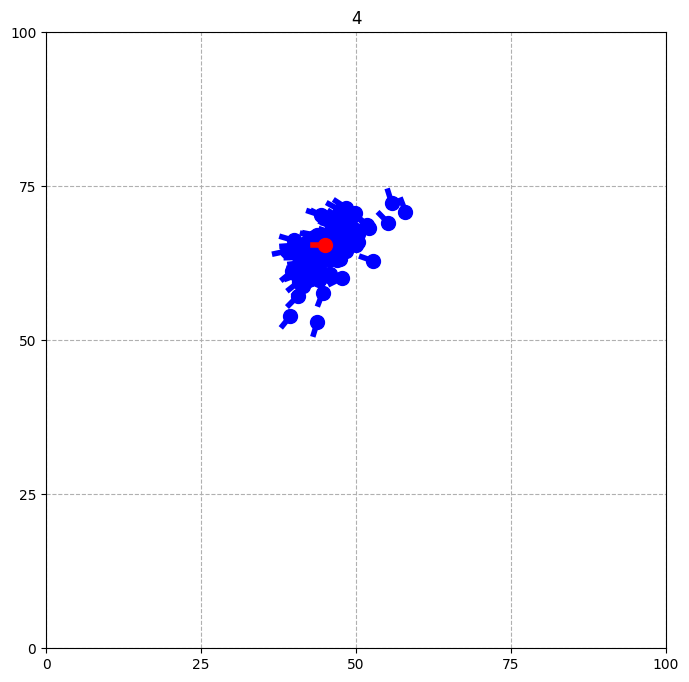

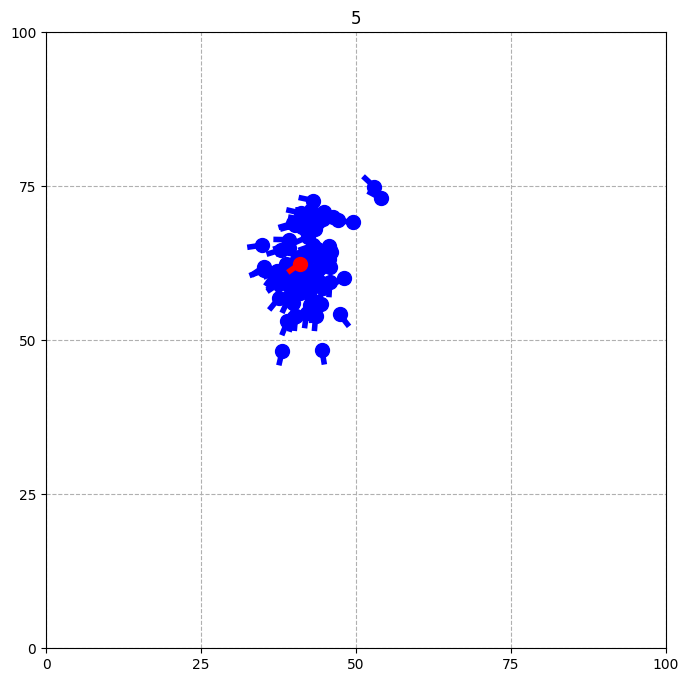

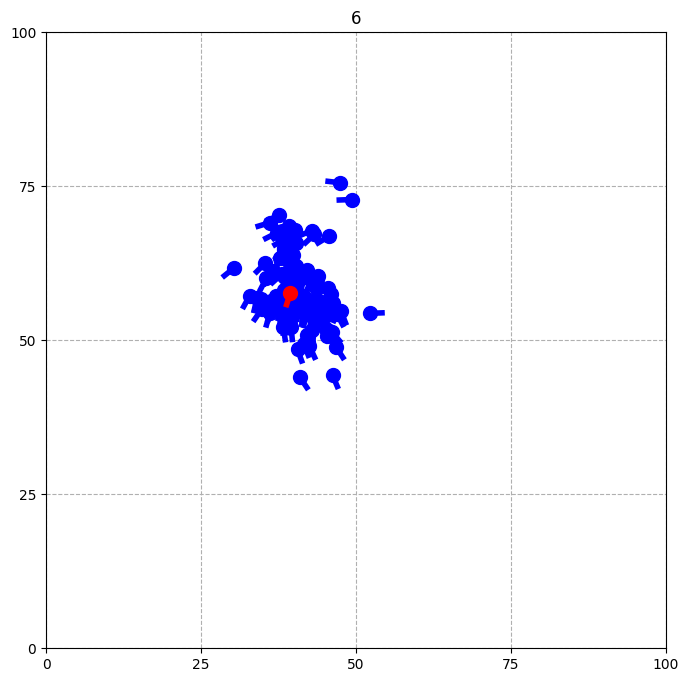

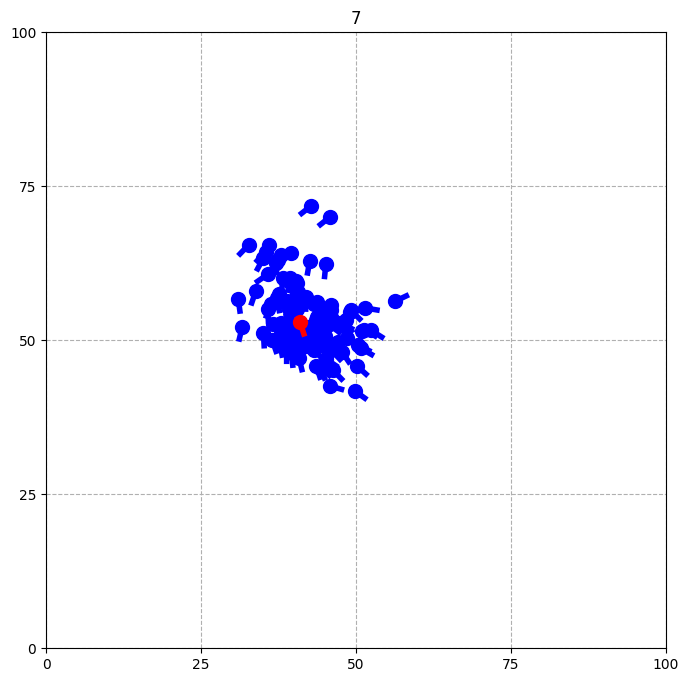

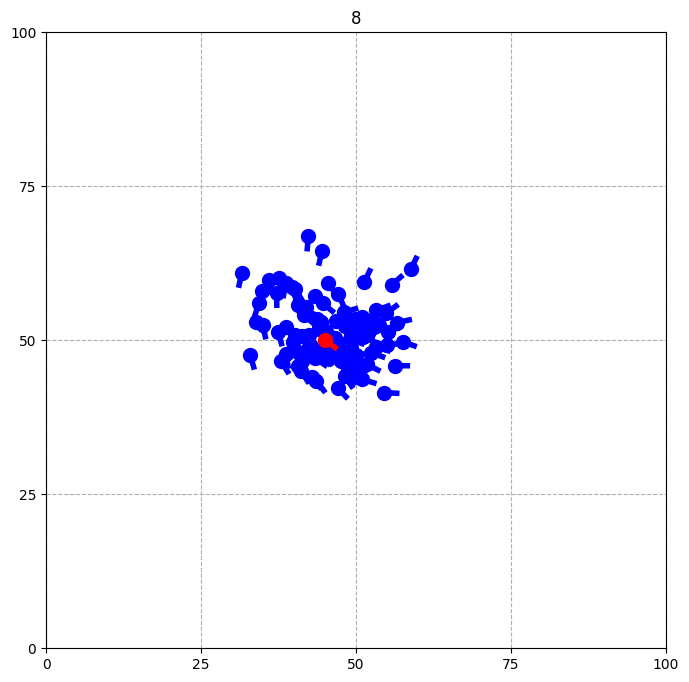

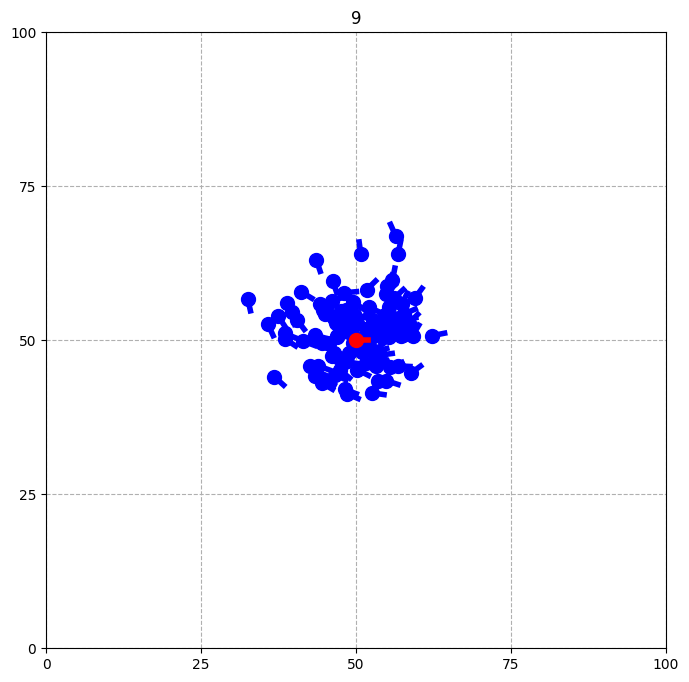

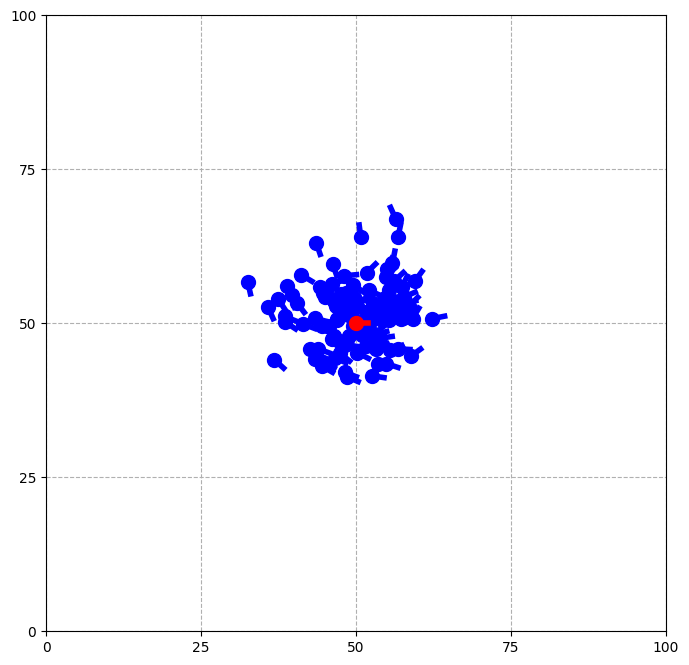

In [10]:
from plot2d import plot
from filter2d import Robot, Particle
import random as r
import math

robot = Robot([50, 50, 0])
particles = []
for i in range(100):
    particles += [Particle([50, 50, 0])]
plot(robot, particles)

autorun = True
for j in range(10):
    robot.move(5, math.pi * 2 / 10)
    for particle in particles:
        particle.predict(5, math.pi * 2 / 10)
    plot(robot, particles, j=j, autorun=autorun)

plot(robot, particles)


In [14]:
from plot2d import plot
from filter2d import Robot, Particle, Pole
import random as r
import math


robot = Robot([50, 50, 0])
poles = [Pole([90, 90, 0]), Pole([80, 50, 0]),
         Pole([50, 70, 0]), Pole([25, 50, 0])]


print("Robot Measurements:")
robot.measure(poles)
for measurement in robot.measurements:
    print("Distance: " + str(round(measurement.distance, 1)) +
          " Angle: " + str(round(measurement.angle, 2)))

print()
print("Measurement Answers:")
print("Distance: 56.6 Angle: 0.79")
print("Distance: 30.0 Angle: 0.0")
print("Distance: 20.0 Angle: 1.57")
print("Distance: 25.0 Angle: 3.14")
plot(robot, poles=poles)


Robot Measurements:


TypeError: list indices must be integers or slices, not Measurement

In [15]:
from plot2d import plot
from filter2d import Robot, Particle, Pole
import random as r
import math

robot = Robot([50, 50, 0])
poles = [Pole([25, 25, 0])]
# Probably comment for real assignment.
poles += [Pole([25, 50, 0])]
particles = []
particles += [Particle([50, 50, 0])]
particles += [Particle([50, 50, math.pi / 8])]
particles += [Particle([75, 75, 0])]
particles += [Particle([55, 55, -math.pi / 4])]
particles += [Particle([45, 35, 0])]

robot.measure(poles)
for particle in particles:
    particle.measure(poles)
    particle.update_weight(robot.measurements)
    print("Weight: " + str(round(particle.weight, 2)))
    for measure in particle.measurements:
        print("Measurements: " + str(round(measure.distance, 2)))

print()
print("Answers:")
print("Weight: 1.0")
print("Weight: 0.54")
print("Weight: 0.0")
print("Weight: 0.12")
print("Weight: 0.25")
plot(robot, particles, poles)


TypeError: list indices must be integers or slices, not Measurement

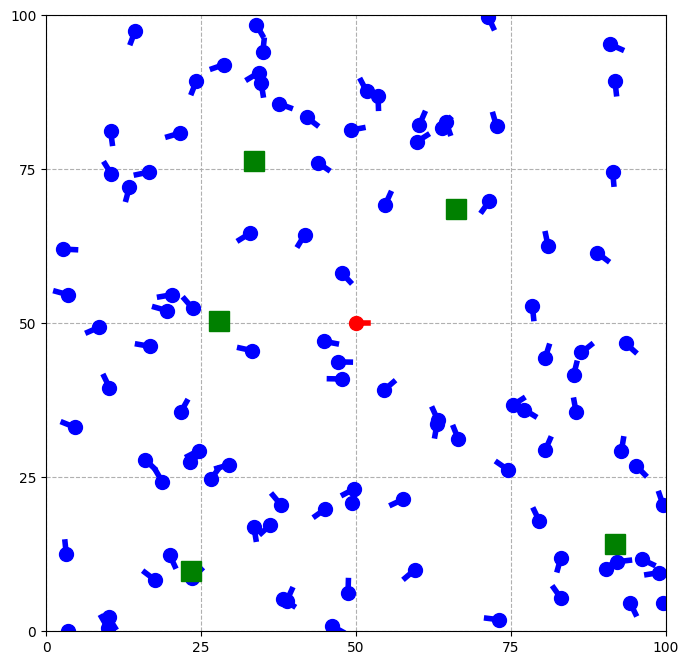

TypeError: list indices must be integers or slices, not Measurement

In [16]:
from plot2d import plot, print_particle_error
from filter2d import Robot, Particle, Pole, resample_particles
import random as r
import math


r.seed(939)
robot = Robot([50, 50, 0])
poles = []
num_poles = 5
for i in range(num_poles):
    x = r.uniform(0, 100)
    y = r.uniform(0, 100)
    poles += [Pole([x, y, 0])]
particles = []
num_particles = 100
for i in range(num_particles):
    x = r.uniform(0, 100)
    y = r.uniform(0, 100)
    theta = r.uniform(0, math.pi * 2)
    particles += [Particle([x, y, theta])]

plot(robot, particles, poles)

robot.measure(poles)
for i in range(20):
    for particle in particles:
        particle.measure(poles)
        particle.update_weight(robot.measurements)
    print_particle_error(robot, particles)
    particles = resample_particles(particles)
    plot(robot, particles, poles, j=i, autorun=True)


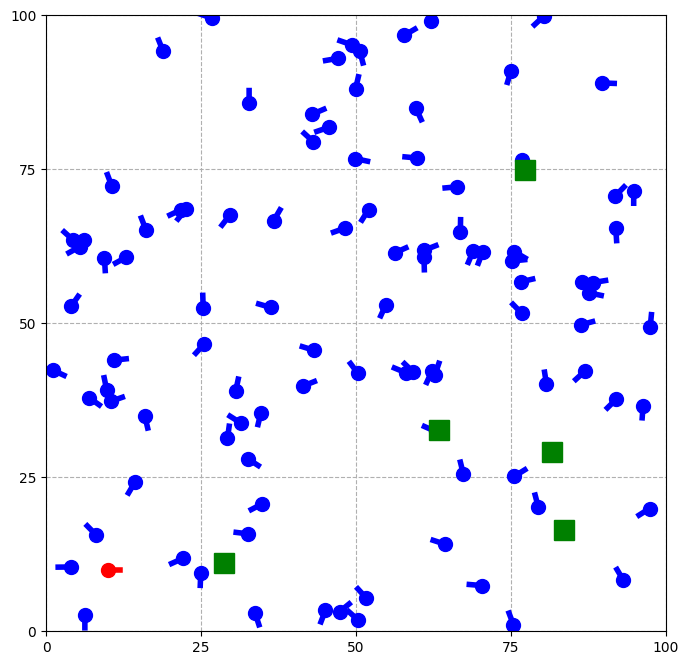

TypeError: list indices must be integers or slices, not Measurement

In [17]:
from plot2d import plot, print_particle_error
from filter2d import Robot, Particle, Pole, resample_particles
import random as r
import math


# r.seed(939)
robot = Robot([10, 10, 0])
poles = []
num_poles = 5
for i in range(num_poles):
    x = r.uniform(0, 100)
    y = r.uniform(0, 100)
    poles += [Pole([x, y, 0])]
particles = []
num_particles = 100
for i in range(num_particles):
    x = r.uniform(0, 100)
    y = r.uniform(0, 100)
    theta = r.uniform(0, math.pi * 2)
    particles += [Particle([x, y, theta])]

plot(robot, particles, poles)


moves = []
for i in range(60):
    if i < 10:
        moves += [[5, 0]]
        continue
    if i < 20:
        moves += [[5, math.pi / 10]]
        continue
    if i < 30:
        moves += [[-3, -math.pi / 20]]
        continue
    if i < 35:
        moves += [[10, 0]]
        continue
    if i < 45:
        moves += [[2, -math.pi / 5]]
        continue
    if i < 55:
        moves += [[4, math.pi / 20]]
        continue

    moves += [[0, 0]]

for i in range(60):
    # Move and Measure Robot
    robot.move(moves[i][0], moves[i][1])
    robot.measure(poles)
    # Move, Measure, and Update Particles
    for particle in particles:
        particle.predict(moves[i][0], moves[i][1])
        particle.measure(poles)
        particle.update_weight(robot.measurements)

    print_particle_error(robot, particles)
    # Resample
    particles = resample_particles(particles)
    plot(robot, particles, poles, j=i, autorun=True, time=0.5)
plot(robot, particles, poles)


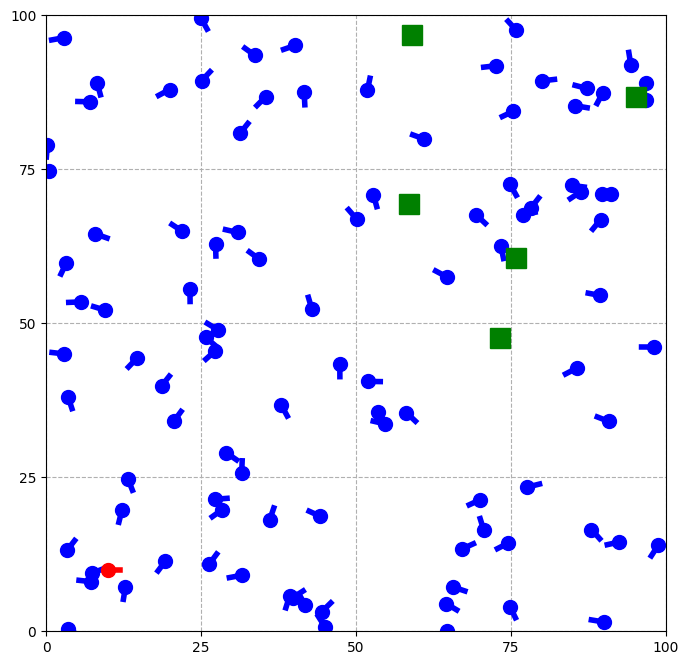

TypeError: list indices must be integers or slices, not Measurement

In [18]:
from plot2d import plot, print_particle_error
from filter2d import Robot, Particle, Pole, resample_particles
import random as r
import math


# r.seed(939)
robot = Robot([10, 10, 0])
poles = []
num_poles = 5
for i in range(num_poles):
    x = r.uniform(0, 100)
    y = r.uniform(0, 100)
    poles += [Pole([x, y, 0])]
particles = []
num_particles = 100
for i in range(num_particles):
    x = r.uniform(0, 100)
    y = r.uniform(0, 100)
    theta = r.uniform(0, math.pi * 2)
    particles += [Particle([x, y, theta])]

plot(robot, particles, poles)


moves = []
for i in range(60):
    if i < 10:
        moves += [[5, 0]]
        continue
    if i < 20:
        moves += [[5, math.pi / 10]]
        continue
    if i < 30:
        moves += [[-3, -math.pi / 20]]
        continue
    if i < 35:
        moves += [[10, 0]]
        continue
    if i < 45:
        moves += [[2, -math.pi / 5]]
        continue
    if i < 55:
        moves += [[4, math.pi / 20]]
        continue

    moves += [[0, 0]]

for i in range(60):
    # Move Robot
    robot.move_with_error(moves[i][0], moves[i][1])  # add noise here
    robot.measure(poles)                 # and add noise here
    # Move and Update Particles
    for particle in particles:
        particle.predict(moves[i][0], moves[i][1])
        particle.measure(poles)
        particle.update_weight(robot.measurements)
    # Resample
    print_particle_error(robot, particles)
    particles = resample_particles(particles)
    plot(robot, particles, poles, j=i, autorun=True, time=0.5, error=True)
plot(robot, particles, poles, error=True)
